In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pprint
from utils.neuron import Neuron
from utils.layer import Layer

In [2]:
n1 = Neuron(1.22)
n2 = Neuron(1.22)

In [3]:
n1.get_state()

0

In [5]:
n1.feed_forward(n2.signal)

n2.feed_forward(n1.signal)

state: 0.9864991785713398 | signal [[0.99671885]
 [0.98649918]
 [1.        ]]

state: 0.6761696795744584 | signal [[0.86742671]
 [0.67616968]
 [1.        ]]



In [6]:
n1.signal

array([[0.99671885],
       [0.98649918],
       [1.        ]])

In [7]:
print(n1.get_state())
print(n2.get_state())

0.9864991785713398
0.6761696795744584


In [8]:
print('')
pprint.pprint(n1.get_weights())
print('')
pprint.pprint(n2.get_weights())


[array([0.99671885]), array([0.98649918])]

[array([0.86742671]), array([0.67616968])]


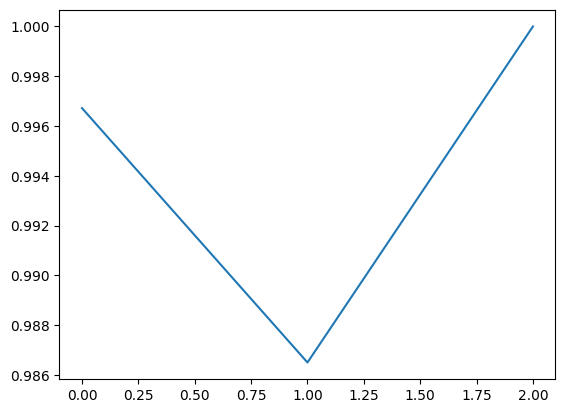

In [9]:
plt.plot(n1.signal)

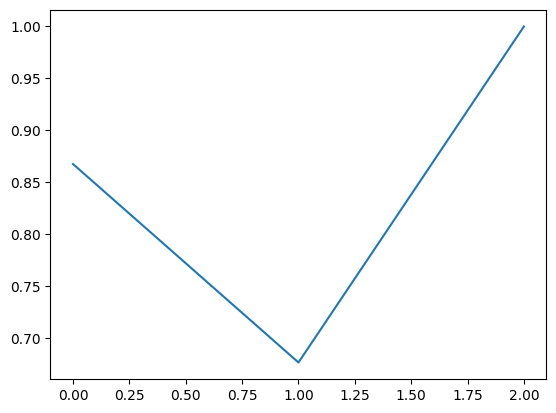

In [10]:
plt.plot(n2.signal)

In [ ]:
df = pd.DataFrame(n1.weights)
df.corr()

In [ ]:
df2 = pd.DataFrame(n2.weights)
df2.corr()

In [ ]:
n1.signal

In [ ]:
def train()

n2.feed_forward(n1)
n1.feed_forward(n2)
plt.plot(n2.signal)
plt.show()

    

In [11]:
transducer = Neuron(1.78293)
layer_1 = Layer(12)
layer_1.forward(transducer.signal)
print(layer_1)

state: 0.9889654614584893 | signal [[0.99271562]
 [0.98896546]
 [1.        ]]

state: 0.9890788403072979 | signal [[0.9258888 ]
 [0.98907884]
 [1.        ]]

state: 0.8208852787775983 | signal [[0.98779002]
 [0.82088528]
 [1.        ]]

state: 0.9816649676620731 | signal [[0.98606355]
 [0.98166497]
 [1.        ]]

state: 0.9908412739032211 | signal [[0.99947438]
 [0.99084127]
 [1.        ]]

state: 0.9534437387448615 | signal [[0.68118821]
 [0.95344374]
 [1.        ]]

state: 0.9902454667871882 | signal [[0.99400576]
 [0.99024547]
 [1.        ]]

state: 0.9903194052206052 | signal [[0.99014219]
 [0.99031941]
 [1.        ]]

state: 0.9861090143011678 | signal [[0.99505369]
 [0.98610901]
 [1.        ]]

state: 0.9903222190619373 | signal [[0.85648647]
 [0.99032222]
 [1.        ]]

state: 0.9904623323409981 | signal [[0.98622041]
 [0.99046233]
 [1.        ]]

state: 0.9966665662553176 | signal [[0.85366934]
 [0.99666657]
 [1.        ]]



In [12]:
for _ in range(12):
    layer_1.forward(layer_1.neurons[0].signal)
    for n in layer_1.neurons:
        plt.plot(n.signal)

ValueError: shapes (2,1) and (3,1) not aligned: 1 (dim 1) != 3 (dim 0)

In [ ]:
print(n2.weights)

In [ ]:
plt.plot(n2.signal)